In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pylab as plt
import pylab as pl

data = files.upload()

Saving FuelConsumption.csv to FuelConsumption.csv


In [2]:
df = pd.read_csv('FuelConsumption.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [5]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]


In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y= np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])



poly = PolynomialFeatures(degree=3)
train_poly =  poly.fit_transform(train_x)
train_poly


array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.   ,  9.   , 27.   ]])

In [10]:
clf =LinearRegression()
y_ = clf.fit(train_poly, train_y)
print("coefitient", clf.coef_)
print("intercept", clf.intercept_)

coefitient [[ 0.         32.96096128  3.74451515 -0.46347414]]
intercept [124.3494905]


Text(0, 0.5, 'CO2EMISSIONS')

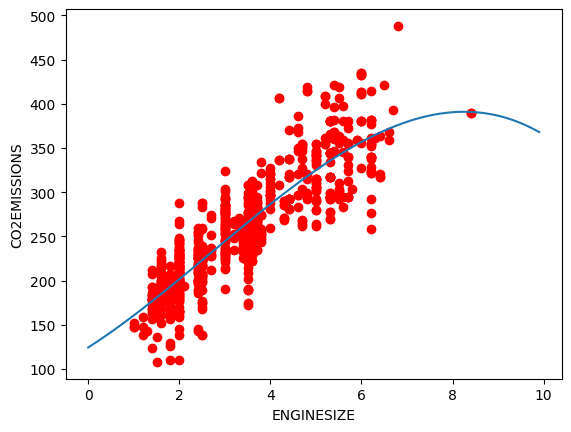

In [17]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color='red')
xx= np.arange(0,10,0.1)
yy=clf.intercept_[0]+ clf.coef_[0][1]*xx +  clf.coef_[0][2]*np.power(xx,2) + clf.coef_[0][3]*np.power(xx,3)
plt.plot(xx,yy)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')